In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model, datasets
from IPython import display

In [2]:
n_samples = 200

In [25]:
data = []
def linear_regression(noise = 5.0, plot_grah = False):
    X, y, coef = datasets.make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=1,
    noise=noise,
    coef=True,
    random_state=1589,
)
    ls = []
    for i in X:
        ls.append(i[0])
    data.append([ls, y])
    # Fit line using all data
    lr = linear_model.LinearRegression().fit(X, y)
    
    # y = mx + b
    r = lr.score(X, y)
    m = lr.coef_[0]
    b = lr.intercept_

    # Predict data of estimated models
    line_X = np.arange(X.min(), X.max())[:, np.newaxis]
    line_y = lr.predict(line_X)

    plt.scatter(
        X, y, color="yellowgreen", marker=".", label="данных"
    )
    if plot_grah:
        plt.axline(xy1=(0, b), slope=m, label=f'$y = {m:.3f}*x {b:+.3f}$ -> r = {r:.3f}')
    plt.title(f'Линейная регрессия {coef:.3f} | Cтепень рассеянности данных: {noise}')
    plt.legend(loc="lower right")
    plt.show()

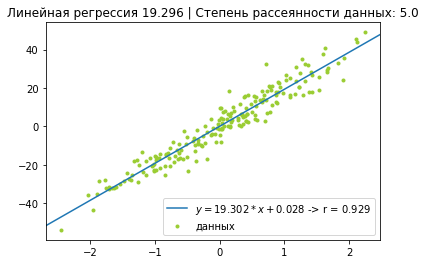

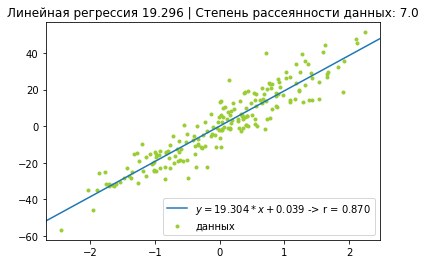

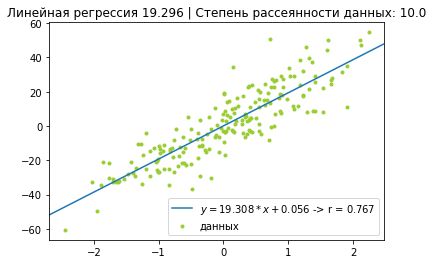

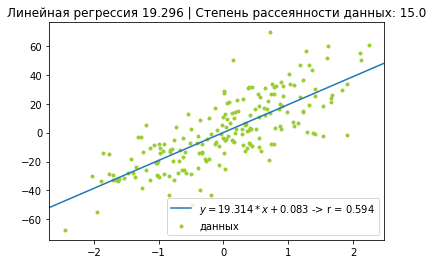

In [42]:
for noise in [5.0, 7.0, 10.0, 15.0]:
    linear_regression(noise, True)

In [5]:
func = lambda th: th[1] - 8.223 * th[0] - (-0.476) # y = mx + b ---> y - mx - b = 0

In [6]:
_X = np.linspace(-3, 3, n_samples)
_Y = np.linspace(-3, 3, n_samples)
_Z = np.zeros((n_samples, n_samples))

In [7]:
for ix, x in enumerate(_X):
    for iy, y in enumerate(_Y):
        _Z[iy, ix] = func([x, y])

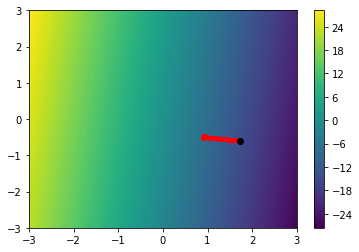

In [41]:
plt.contourf(_X, _Y, _Z, 100)
plt.colorbar()

point = np.random.rand(2) * 6 - 3
plt.plot(point[0], point[1], "o", c="red")

#Sea h el pequeño incremento para el método de las diferencias finitas.
#h es válido tanto para x como para y.
h = 0.000001
grad = np.zeros(2) # Inicializando el vector gradiente, con dos componetes
lr = 0.0001 # Hiperparámetro Learning Rate
 
for _ in range(1000): #Epochs que describen el recorrido del punto.
    for it, th in enumerate(point): #Recorrido de las componentes del
        _T = np.copy(point)
        _T[it] = _T[it] + h
        deriv = (func(_T) - func(point))/h # Método numérico de las diferencias finitas
        grad[it] = deriv

    point = point - lr*grad #Esta es la parte central del metodo del gradiente.
#     print(func(point)) #Esto es un método para ver analíticamente el funcionamiento del algoritmo
    
    if ( _ % 10 == 0):
        plt.plot(point[0], point[1], ".", c = "red") #Rojo para el recorrido
    
plt.plot(point[0], point[1], "o", c = "black") #Negro para el punto final
plt.show()

In [9]:
def animate_gradient_descent():
    alpha = 0.2
    xs = data[0][0]
    ys = data[0][1]
    cycles = 500
    
    #calculate number of points, adjust alpha by normalized alpha
    n = len(xs)
    adj_alpha = (1/n)*alpha
    
    #create dataframe from x's and y's
    values = pd. DataFrame({'x':xs, 'y':ys})
    
    #set weights
    #m = slope
    #b = intercept
    #pvb - path value of b
    #pvm = path value of m
    #path values are observed - predicted / number of values (2)
    weights = pd.DataFrame({'cycle0':[1, 1, 0, 0]}, index=['m','b','pvb', 'pvm'])
    values ['cycle0'] = weights['cycle0'].m*values['x'] + weights['cycle0'].b
                                                                  
    for cycle in range(1, cycles+1):
        p_cycle_name = 'cycle'+str(cycle-1)
        c_cycle_name = 'cycle'+str(cycle)
        
        error = values[p_cycle_name]-values ['y']
        path_value_b = sum(error)
        path_value_m = sum(error * values ['x'])
        
        new_m = weights[p_cycle_name].m - path_value_m * adj_alpha
        new_b = weights[p_cycle_name].b - path_value_b * adj_alpha
                                                                  
        weights[c_cycle_name] = [new_m, new_b, path_value_m, path_value_b]
        
        y_pred = weights[c_cycle_name].m*values['x'] + weights[c_cycle_name].b
        
        values[c_cycle_name] = y_pred
    return values

values = animate_gradient_descent()

C:\Users\Porti\AppData\Local\Temp/ipykernel_6792/2247519561.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  values[c_cycle_name] = y_pred
C:\Users\Porti\AppData\Local\Temp/ipykernel_6792/2247519561.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  weights[c_cycle_name] = [new_m, new_b, path_value_m, path_value_b]


In [44]:
# animation time
from matplotlib.animation import FuncAnimation

for i in range(4):
    alpha = 0.001
    xs = data[i][0]
    ys = data[i][1]
    cycles = 500

    fig, ax = plt.subplots()
    plt.xlim(0, max(xs))
    plt.ylim(0, max (ys))
    ax.scatter(xs, ys)
    lines = plt.plot([])
    line = lines[0]

    def animate(i):
        y_val = values['cycle'+str(i)]
        label = 'cycle {0}'.format(i + 1)
        line.set_data(xs, y_val)
        ax.set_xlabel(label)
        return line, ax

    anim = FuncAnimation(fig, animate, frames=np.arange(0, 40), interval=100)
    video = anim.to_html5_video()
    html = display.HTML(video)
    display.display(html)

    plt.close()

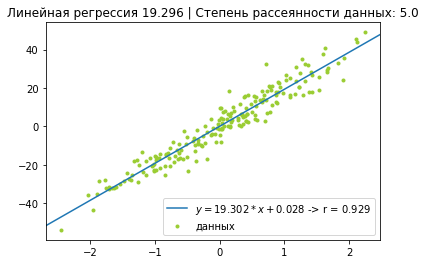

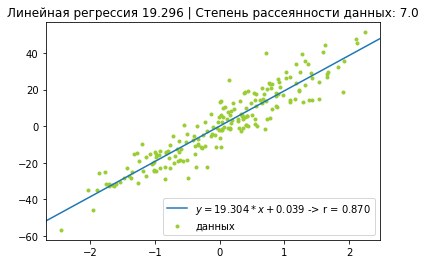

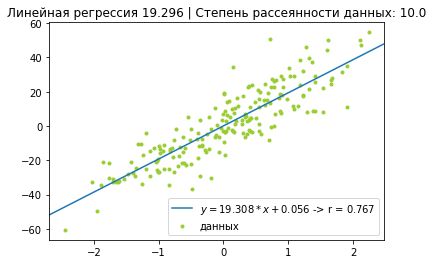

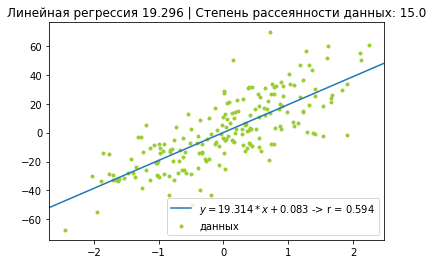

In [27]:
for noise in [5.0, 7.0, 10.0, 15.0]:
    linear_regression(noise, True)